# libraries to deal with data

In [23]:
import pandas as pd
import numpy as np

# libraries used for visualization

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv("nhl_stats1.csv")

In [70]:
df.head()

,season,player,age,team,position,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits
0,2018,Pontus Aberg,24,TOT,LW,53,4,0.0755,12,16,70,6.0,645.0,8,24
1,2018,Noel Acciari,26,BOS,C,60,10,0.1667,1,11,66,15.0,775.0,41,152
2,2018,Michael Amadio,21,LAK,C,37,4,0.1081,4,8,28,14.0,345.0,9,18
3,2018,Andy Andreoff,26,LAK,LW,45,3,0.0667,6,9,47,6.0,423.0,11,77
4,2018,Sven Andrighetto,24,COL,RW,50,8,0.1600,14,22,111,7.0,724.0,18,38


# Shape method can be used to check the exact shape of data

In [72]:
df.shape

(5262, 15)

# nunique() function provides the total number of uniques values present in each feature

In [74]:
df.nunique()

season               19
player             2028
age                  27
team                 35
position              8
games_played         57
goals                32
goals_per_game      648
assists              41
points               61
shots               182
shot_percentage      32
time_on_ice         854
blocks              114
hits                235
dtype: int64

# 'column' method provides name of each column 

In [77]:
df.columns

Index(['season', 'player', 'age', 'team', 'position', 'games_played', 'goals',
       'goals_per_game', 'assists', 'points', 'shots', 'shot_percentage',
       'time_on_ice', 'blocks', 'hits'],
      dtype='object')

# info() function gives information about each feature such as no of samples (rows), no of columns along with their data

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           5262 non-null   int64  
 1   player           5262 non-null   object 
 2   age              5262 non-null   int64  
 3   team             5262 non-null   object 
 4   position         5262 non-null   object 
 5   games_played     5262 non-null   int64  
 6   goals            5262 non-null   int64  
 7   goals_per_game   5262 non-null   float64
 8   assists          5262 non-null   int64  
 9   points           5262 non-null   int64  
 10  shots            5262 non-null   int64  
 11  shot_percentage  5262 non-null   float64
 12  time_on_ice      5262 non-null   float64
 13  blocks           5262 non-null   int64  
 14  hits             5262 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 616.8+ KB


# analyze the spread of the "games_played" column

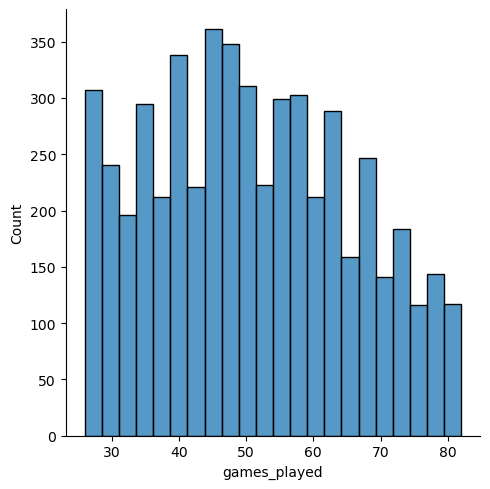

In [97]:
sns.displot(df["games_played"], kde=False)

# y axis is the count for each bin
# X is the actual bin of each year 

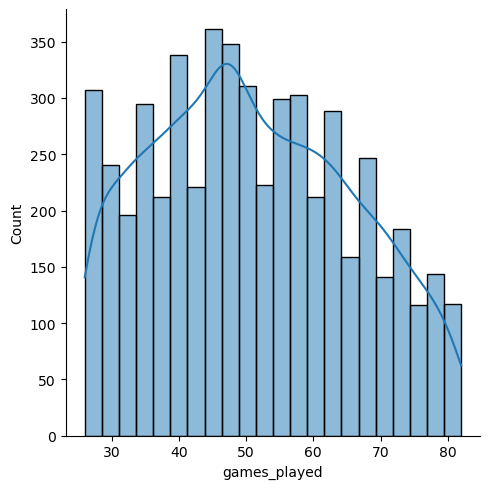

In [99]:
# KDE is the KERNEL DENSITY ESTIMATOR
# Gives the distribution 
# Y-axis is the proportion of data and not count inside the KDE line
sns.displot(df["games_played"], kde=True)

<Axes: xlabel='goals_per_game', ylabel='Count'>

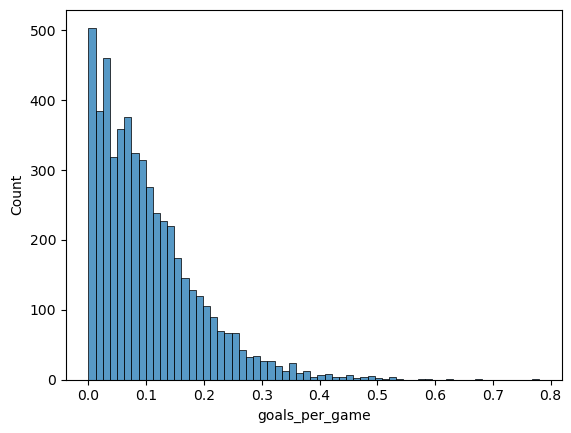

In [107]:
sns.histplot(data=df, x="goals_per_game")

In [111]:
# this plot is similar to above displot and also shows kernal density estimator with normal distribution 
# distribution is slightly skewed towards right

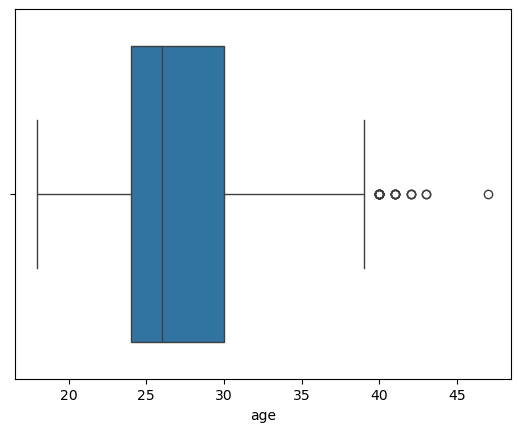

In [119]:
# in case we need to check outliers we will use boxplot
ax = sns.boxplot(x=df["age"])

In [121]:
# The median age is 26. There are few outliers in age feature.

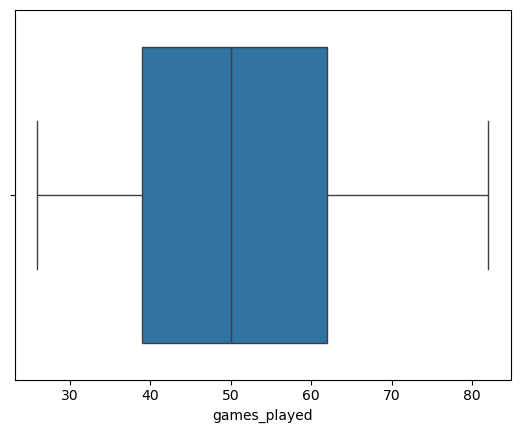

In [123]:
ax = sns.boxplot(x=df["games_played"])

In [127]:
# there are no outliers in game played features. The median value of games_played feature is 50.

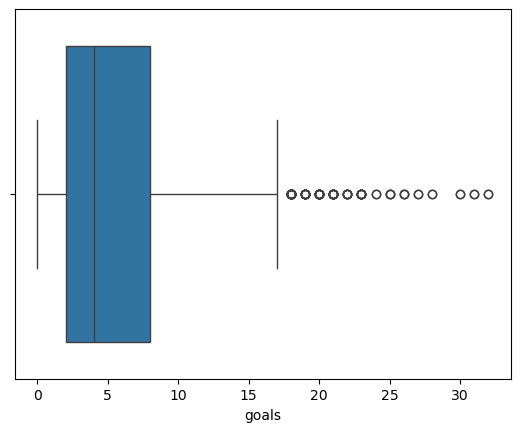

In [129]:
ax = sns.boxplot(x=df["goals"])

In [133]:
# The median value of goals scored is 4.There are many outliers in "goals" feature.

# How many matches where played in 2017?

In [136]:
df['season'][df['season']== 2017].value_counts()

season
2017    257
Name: count, dtype: int64

In [138]:
#count of season(year) 2017 is 257

# In which year maximum matches where played?

In [141]:
#we can check by bar plot by pandas dataframe

<Axes: xlabel='season'>

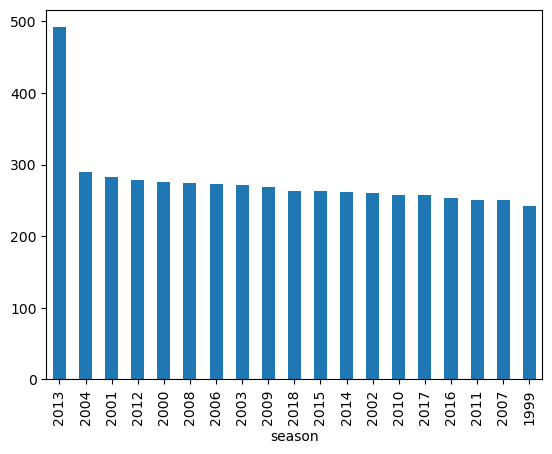

In [145]:
df['season'].value_counts().plot.bar()

In [147]:
# It seems in 2013 maximum leagues where played Appxo.450

# what is the most common age of player and how many players of that age are present during 1999-2018 leagues data ?

<Axes: xlabel='age'>

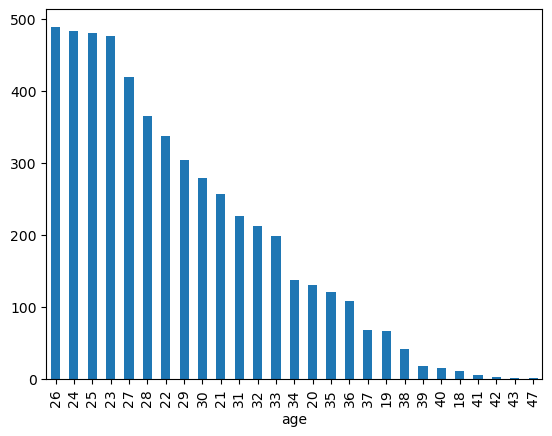

In [150]:
df['age'].value_counts().plot.bar()

In [152]:
# appxo. 490 players are 26 years old

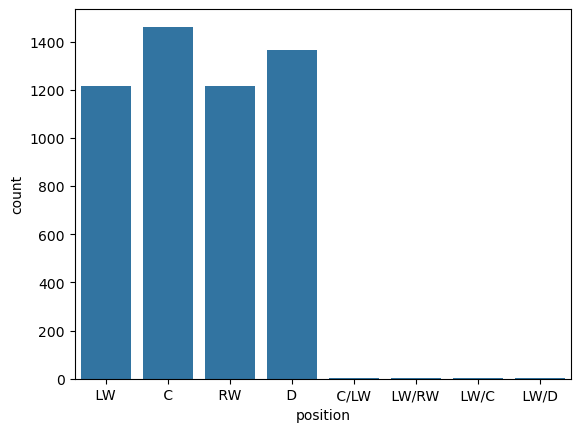

In [154]:
ax = sns.countplot(x="position", data=df)

In [156]:
# players only played on C, LW, RW and D positions. Almost no player played on mixed positions 

In [166]:
# total no of positions represented with matplotlib plotly pie chart centers(C) have the highest no of positions filled with defenseman(D)a close 
# second for the most part all positions are evenly spreadout

# Total no of players in each position

In [173]:
df['position'].count()
df['position'].value_counts()

position
C         1462
D         1364
LW        1217
RW        1214
C/LW         2
LW/RW        1
LW/C         1
LW/D         1
Name: count, dtype: int64

# Matplotlib plotly pie chart for visualization of total no of positions are represented

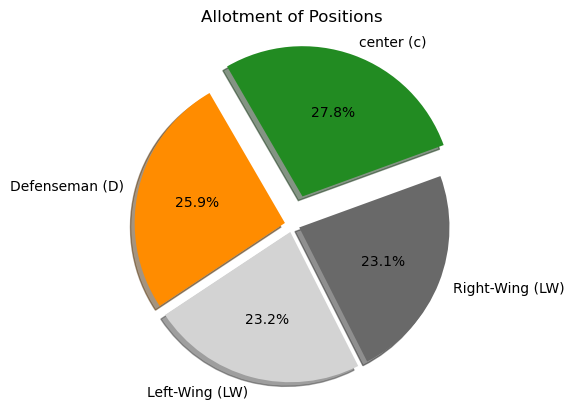

<Figure size 640x480 with 0 Axes>

In [204]:
# no of goals of each position in order from greatest to least 
positions = [1462,1364,1217,1214]
#Labels for each portion of the pie. Mixed positions are left off for lack of significant numbers.
my_labels = 'center (c)','Defenseman (D)','Left-Wing (LW)','Right-Wing (LW)'  
# colors assigned to maintain consistent color schema
my_colors = ['forestgreen','darkorange','lightgray','dimgrey']
# Breaking of centre (c) piece of the pie for enhanced visualization of largest portion
my_explode = (0.2, 0.05, 0.05, 0.05)


#putting the pie chart together from the variables created above
plt.pie(positions, labels=my_labels, autopct='%1.1f%%', startangle=20, shadow = True, colors = my_colors, explode = my_explode)
#Assigned title of pie chart
plt.title('Allotment of Positions')
# Scaling both axes equally for a perfectly rounded pie chart
plt.axis('equal')
# displays the pie chart
plt.show()
plt.tight_layout();

# How is goal related to number of games played by different players?

<Axes: xlabel='games_played', ylabel='goals'>

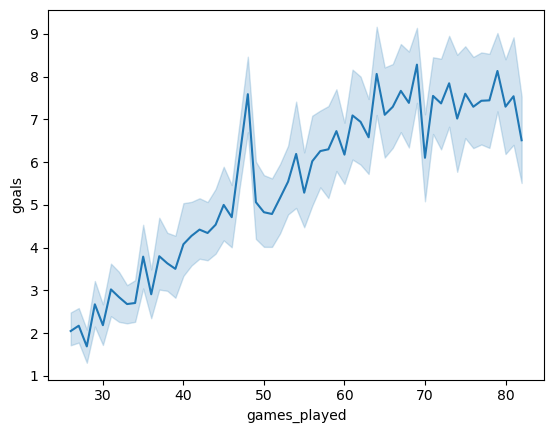

In [207]:
sns.lineplot(x=df["games_played"], y=df["goals"], data=df)

In [209]:
# Players who played more than 60 games show significantly higher goals.i.e 8

<Axes: xlabel='games_played', ylabel='hits'>

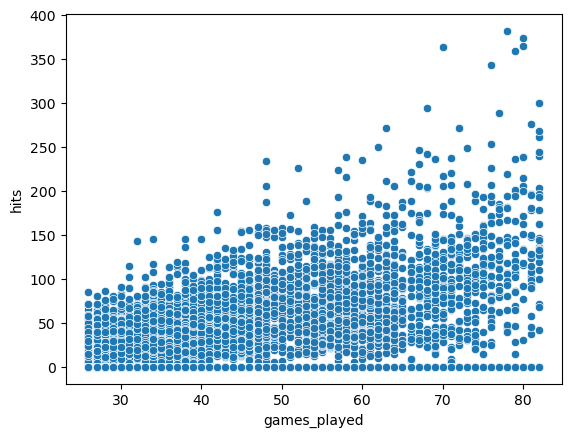

In [213]:
sns.scatterplot(x=df["games_played"], y=df["hits"], data=df)

In [219]:
# Maximum Number of hits were observed during the range of 70-80 games being played

# Catogorical feature and contineous feature

<Axes: xlabel='position', ylabel='points'>

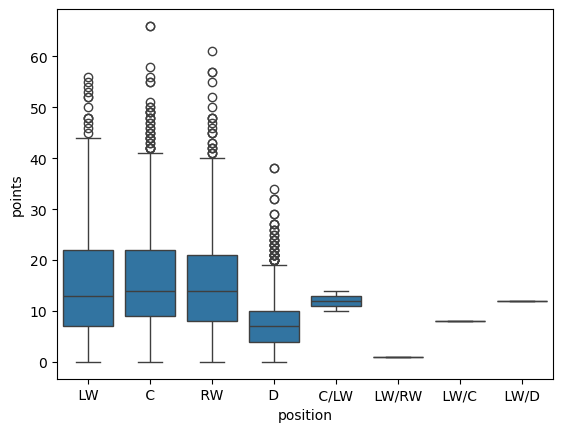

In [217]:
sns.boxplot(x=df["position"], y=df["points"], data=df)

In [222]:
# The median of points for centre, left-Wing and Right-Wing positions are almost same i.e arount 12 to 13

<Axes: xlabel='season', ylabel='goals'>

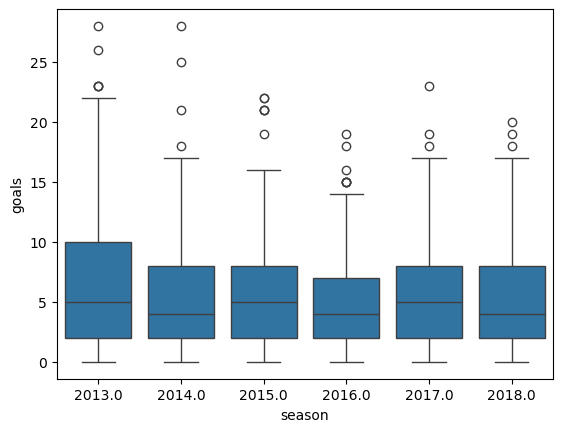

In [226]:
sns.boxplot(x=df["season"][df["season"].isin([2018, 2017, 2016, 2015, 2014, 2013])], y=df["goals"], data=df)

In [228]:
# Median goals for all seasons between 2013-2018 are approximately 5

<Axes: xlabel='player', ylabel='age'>

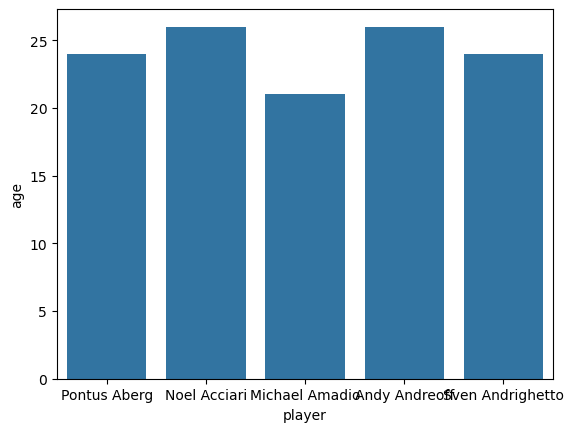

In [230]:
sns.barplot(x=df["player"].head(5), y=df["age"], data=df)

In [232]:
# Most of the players are age 26

# No of goals per game for season 1999-2003 

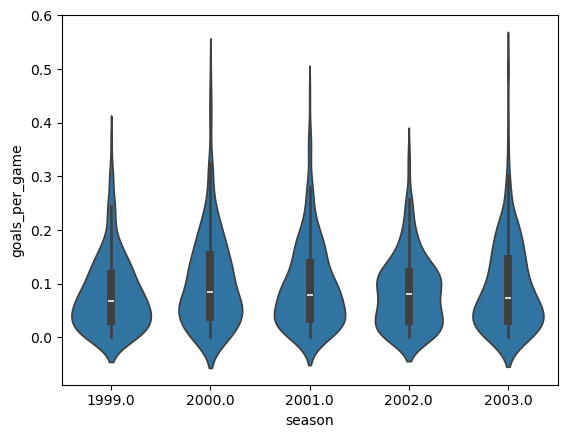

In [236]:
ax = sns.violinplot(x=df["season"][df["season"].isin([1999,2000,2001,2002,2003])], y="goals_per_game", data=df)

In [239]:
# median goals_per_game for all seasons between 1999-2003 are approx. 0.1

C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vivek\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.8% of the points

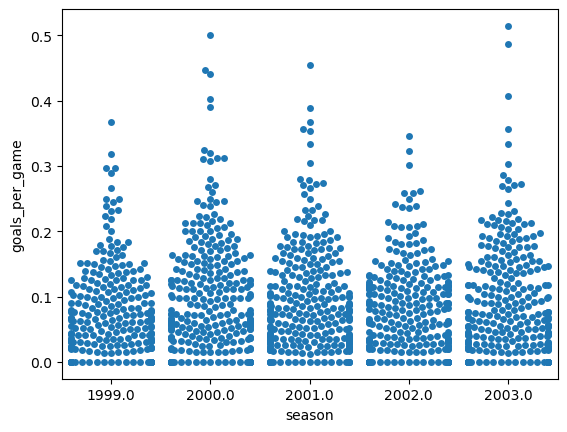

In [241]:
ax = sns.swarmplot(x=df["season"][df["season"].isin([1999,2000,2001,2002,2003])], y="goals_per_game", data=df)

# Two categorical features

In [244]:
#Players who played from more than one position.
pd.crosstab(df['player'], df['position']).head(10)

position,C,C/LW,D,LW,LW/C,LW/D,LW/RW,RW
player,,,,,,,,
Aaron Downey,0,0,0,0,0,0,0,5
Aaron Gavey,1,0,0,1,0,0,0,0
Aaron Johnson,0,0,7,0,0,0,0,0
Aaron Miller,0,0,2,0,0,0,0,0
Aaron Palushaj,0,0,0,0,0,0,0,1
Aaron Rome,0,0,4,0,0,0,0,0
Aaron Volpatti,0,0,0,1,0,0,0,1
Aaron Voros,0,0,0,3,0,0,0,0
Aaron Ward,0,0,3,0,0,0,0,0


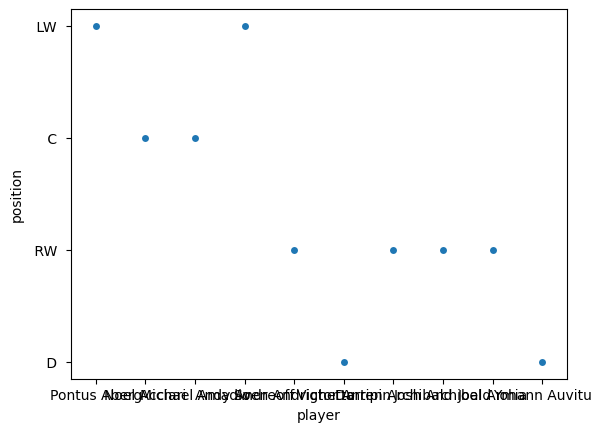

In [246]:
# Reduce the head counter to see the names of the players 
ax = sns.stripplot(x=df["player"].head(10), y=df["position"], data=df)

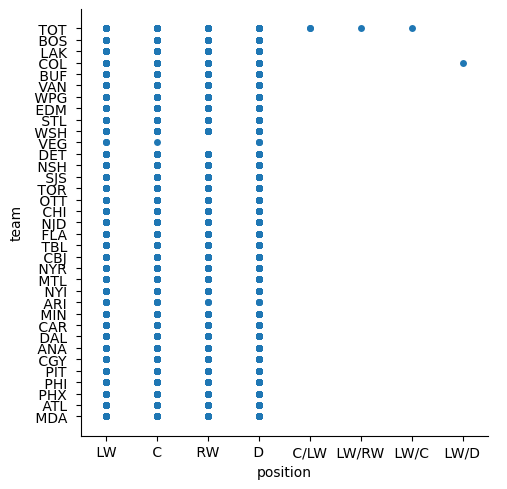

In [248]:
sns.catplot(x="position", y="team", jitter=False, data=df)

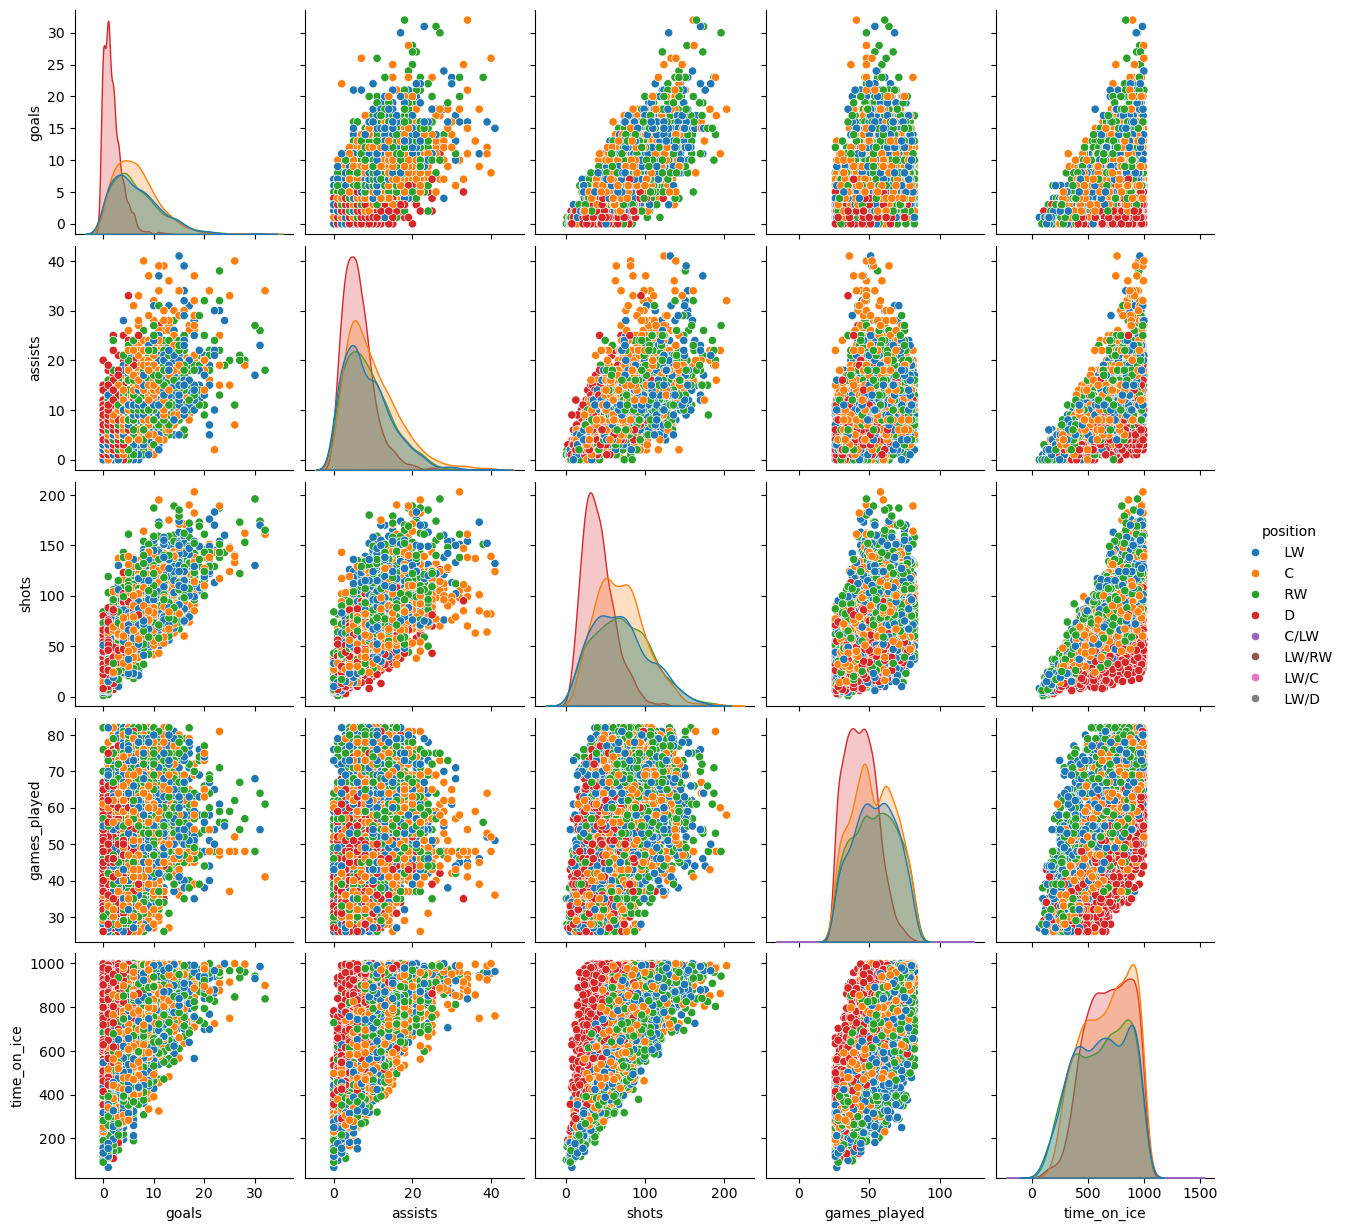

In [250]:
sns.pairplot(df, hue='position', vars=['goals','assists','shots','games_played','time_on_ice'])

In [254]:
# Goals, assists and shots features have right skwed distribution where as time_on_ice and games_played have almost normal distribution 
# Mixed positions are hardly played by any player.

In [270]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = df_numeric.corr()
corr

,season,age,games_played,goals,goals_per_game,assists,points,shots,shot_percentage,time_on_ice,blocks,hits
season,1.000000,-0.024527,-0.066537,0.033427,0.056054,0.013517,0.024329,0.084963,-0.019449,0.046921,0.604037,0.612087
age,-0.024527,1.000000,0.100432,-0.024277,-0.049837,0.032985,0.008871,-0.037326,-0.009285,0.095891,0.042303,-0.000961
games_played,-0.066537,0.100432,1.000000,0.361651,0.063900,0.313912,0.367185,0.507312,0.145172,0.651323,0.029159,0.237571
goals,0.033427,-0.024277,0.361651,1.000000,0.924798,0.655635,0.883623,0.793164,0.719150,0.493884,-0.111499,0.040601
goals_per_game,0.056054,-0.049837,0.063900,0.924798,1.000000,0.592096,0.808346,0.669135,0.745204,0.308434,-0.131078,-0.028963
assists,0.013517,0.032985,0.313912,0.655635,0.592096,1.000000,0.932861,0.684174,0.333824,0.610122,0.000382,-0.028588
points,0.024329,0.008871,0.367185,0.883623,0.808346,0.932861,1.000000,0.802641,0.550089,0.613941,-0.052958,0.001643
shots,0.084963,-0.037326,0.507312,0.793164,0.669135,0.684174,0.802641,1.000000,0.291485,0.667035,-0.010815,0.141753
shot_percentage,-0.019449,-0.009285,0.145172,0.719150,0.745204,0.333824,0.550089,0.291485,1.000000,0.123520,-0.178639,-0.033533
time_on_ice,0.046921,0.095891,0.651323,0.493884,0.308434,0.610122,0.613941,0.667035,0.123520,1.000000,0.297043,0.172212


<Axes: >

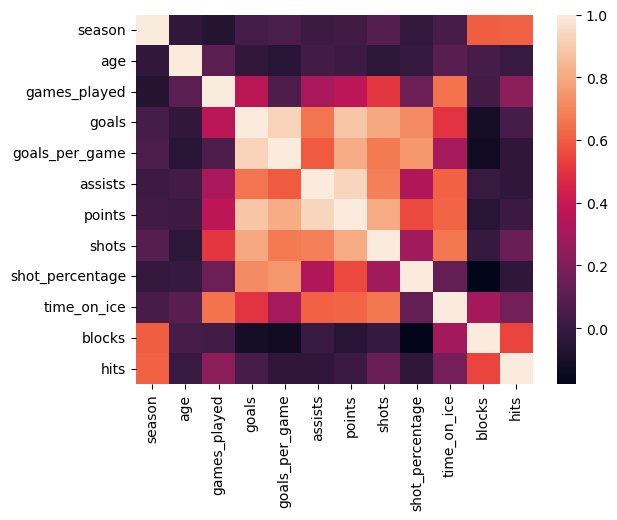

In [272]:
sns.heatmap(corr)